<a href="https://colab.research.google.com/github/Zardian18/Covid-classifcation/blob/master/Covid19_identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import zipfile
zip_ref= zipfile.ZipFile("archive.zip")
zip_ref.extractall()
zip_ref.close()

In [3]:
covid_dir="dataset/covid/"
normal_dir="dataset/normal/"
data_dir="dataset/"

In [4]:
import os

for dirpath, dirname, filename in os.walk(data_dir):
  print(f" There are {len(dirname)} folders and {len(filename)} images in '{dirpath}'")

 There are 2 folders and 0 images in 'dataset/'
 There are 0 folders and 69 images in 'dataset/covid'
 There are 0 folders and 25 images in 'dataset/normal'


## Viewing the data

In [5]:
import matplotlib.image as mpimg
import random
import matplotlib.pyplot as plt

def view_random_image(data_dir, class_name):
  target_dir= data_dir+ class_name
  random_img= random.sample(os.listdir(target_dir),1)

  img_name= target_dir+"/"+random_img[0]

  img= mpimg.imread(img_name)
  print(img.shape)
  plt.imshow(img, cmap="gray")
  plt.axis(False)
  plt.title(class_name);


(1308, 1652, 3)


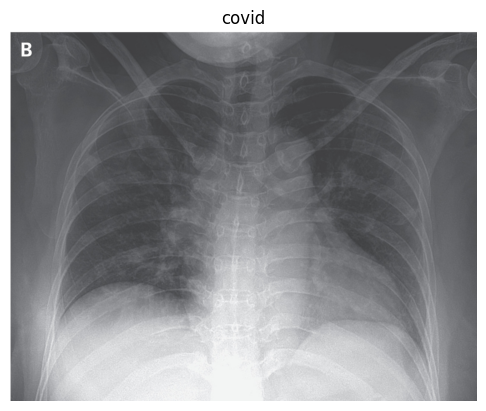

In [6]:
view_random_image(data_dir, "covid")

(1496, 1642)


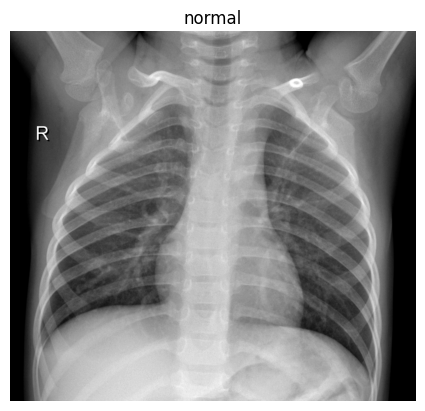

In [7]:
view_random_image(data_dir, "normal")

In [8]:
!ls ./dataset/covid

01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg
1312A392-67A3-4EBF-9319-810CF6DA5EF6.jpeg
1B734A89-A1BF-49A8-A1D3-66FAFA4FAC5D.jpeg
1-s2.0-S0140673620303706-fx1_lrg.jpg
1-s2.0-S0929664620300449-gr2_lrg-a.jpg
1-s2.0-S0929664620300449-gr2_lrg-b.jpg
1-s2.0-S0929664620300449-gr2_lrg-c.jpg
1-s2.0-S0929664620300449-gr2_lrg-d.jpg
1-s2.0-S1684118220300608-main.pdf-001.jpg
1-s2.0-S1684118220300608-main.pdf-002.jpg
1-s2.0-S1684118220300682-main.pdf-002-a1.png
1-s2.0-S1684118220300682-main.pdf-002-a2.png
1-s2.0-S1684118220300682-main.pdf-003-b1.png
1-s2.0-S1684118220300682-main.pdf-003-b2.png
23E99E2E-447C-46E5-8EB2-D35D12473C39.png
2C26F453-AF3B-4517-BB9E-802CF2179543.jpeg
31BA3780-2323-493F-8AED-62081B9C383B.jpeg
41591_2020_819_Fig1_HTML.webp-day10.png
41591_2020_819_Fig1_HTML.webp-day5.png
6CB4EFC6-68FA-4CD5-940C-BEFA8DAFE9A7.jpeg
7AF6C1AF-D249-4BD2-8C26-449304105D03.jpeg
7C69C012-7479-493F-8722-ABC29C60A2DD.jpeg
80446565-E090-4187-A031-9D3CEAA586C8.jpeg
85E52EB3-56E9-4D67-82DA-DEA247C82886.jpeg
8FD

## Getting Data ready

In [9]:
test_dir="test/"
train_dir="dataset/"

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen= ImageDataGenerator(rescale=1/255.)
test_datagen= ImageDataGenerator(rescale=1/255.)

In [22]:
train_data= train_datagen.flow_from_directory(directory=train_dir,
                                              target_size=(224,224),
                                              class_mode="binary",
                                              batch_size=32)
test_data=test_datagen.flow_from_directory(directory=test_dir,
                                           target_size=(224,224),
                                           class_mode="binary",
                                           batch_size=32)


Found 92 images belonging to 2 classes.
Found 2 images belonging to 3 classes.


In [14]:
!ls -a ./test

.  ..  covid  .ipynb_checkpoints  normal


## Transfer Learning Model

In [15]:
model_url="https://tfhub.dev/tensorflow/efficientnet/b3/feature-vector/1"

In [16]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers

In [17]:
def create_model(model_url, num_classes=2):
  feature_extractor_layer= hub.KerasLayer(model_url,
                                          trainable=False,
                                          name="feature_extractor",
                                          input_shape=(224,224,3))

  model=tf.keras.Sequential()
  model.add(feature_extractor_layer)
  model.add(layers.Dense(1, activation="sigmoid", name="output_layer"))

  return model

In [18]:
efficienetb3_model= create_model(model_url)

In [23]:
efficienetb3_model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                       optimizer=tf.keras.optimizers.Adam(),
                       metrics=["accuracy"])

In [24]:
history1=efficienetb3_model.fit(train_data,
                          epochs=10,
                          steps_per_epoch=len(train_data))

Epoch 1/10
3/3 [==============================] - 17s 587ms/step - loss: 0.7236 - accuracy: 0.5000
Epoch 2/10
3/3 [==============================] - 2s 442ms/step - loss: 0.5373 - accuracy: 0.7283
Epoch 3/10
3/3 [==============================] - 3s 860ms/step - loss: 0.4556 - accuracy: 0.7391
Epoch 4/10
3/3 [==============================] - 2s 459ms/step - loss: 0.4095 - accuracy: 0.7391
Epoch 5/10
3/3 [==============================] - 2s 461ms/step - loss: 0.3595 - accuracy: 0.7717
Epoch 6/10
3/3 [==============================] - 2s 522ms/step - loss: 0.3144 - accuracy: 0.8152
Epoch 7/10
3/3 [==============================] - 2s 557ms/step - loss: 0.2683 - accuracy: 0.9239
Epoch 8/10
3/3 [==============================] - 3s 756ms/step - loss: 0.2339 - accuracy: 0.9674
Epoch 9/10
3/3 [==============================] - 3s 652ms/step - loss: 0.2066 - accuracy: 0.9891
Epoch 10/10
3/3 [==============================] - 2s 683ms/step - loss: 0.1893 - accuracy: 0.9891


In [25]:
len(train_data)

3

In [26]:
efficienetb3_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extractor (KerasLa  (None, 1536)              10783528  
 yer)                                                            
                                                                 
 output_layer (Dense)        (None, 1)                 1537      
                                                                 
Total params: 10785065 (41.14 MB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 10783528 (41.14 MB)
_________________________________________________________________


<Axes: >

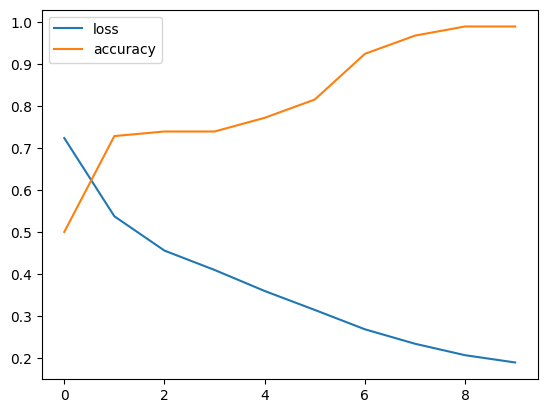

In [27]:
import pandas as pd

pd.DataFrame(history1.history).plot()

Predicting on test data

In [28]:
len(test_data)

1

(4095, 3342)


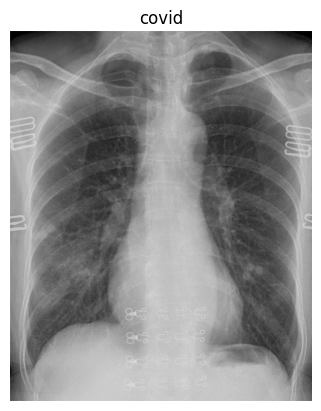

In [29]:
view_random_image(test_dir, "covid")

## Making predictions on custom data

In [30]:
img_path="/content/test/covid/ryct.2020200028.fig1a.jpeg"

In [31]:
img=mpimg.imread(img_path)

In [32]:
img.shape

(4095, 3342)

In [33]:
def preprocess_img(filename, img_shape=224):
  img=tf.io.read_file(filename)
  img=tf.image.decode_image(img)
  img=tf.image.resize(img, size=[img_shape,img_shape])
  img=img/255.
  return img

In [34]:
img= preprocess_img(img_path)
img.shape

TensorShape([224, 224, 1])

In [35]:
expanded_img= tf.expand_dims(img, axis=0)
expanded_img.shape

TensorShape([1, 224, 224, 1])

In [37]:
preds=efficienetb3_model.predict(test_data)

1/1 [==============================] - 4s 4s/step


In [38]:
def prediction_class(pred):
  if pred>0.5:
    return "Normal"

  return "Covid"

(-0.5, 3341.5, 4094.5, -0.5)

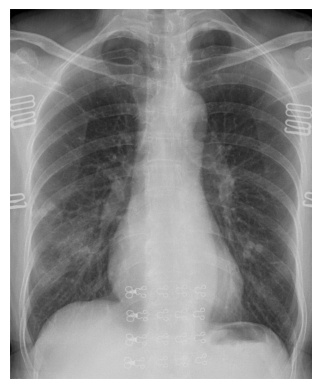

In [39]:
img= mpimg.imread(img_path)
plt.imshow(img, cmap="gray")
plt.axis(False)

In [40]:
prediction_class(preds[0])

'Covid'